In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
import yfinance as yf  
from scipy import stats
import quandl
import pandas as pd
from matplotlib.pyplot import figure
from scipy.stats import probplot
from scipy.stats import pearsonr
from scipy.stats import kurtosis
from scipy.stats import skew
import statistics

[]

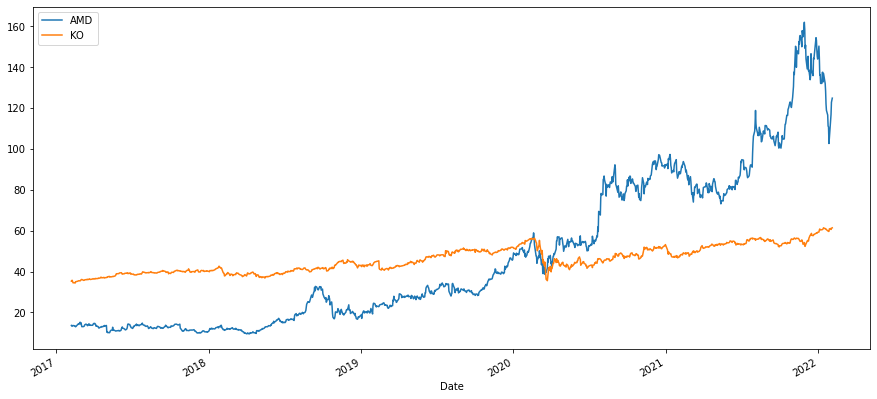

In [2]:
# Stock price plotted against time
# Variables to start 
start = '2017-01-01'
end = '2022-01-01'

S1 = 'AMD'
S2 = 'KO'

#Calls the ticker symbol
stock1 = yf.Ticker(S1)
stock2 = yf.Ticker(S2)

#Calls the dataset shows date, close, open, volume etc.
stock1df = stock1.history(period='5y', method ='ffill')
stock2df = stock2.history(period='5y', method = 'ffill')

#assigns stock1Close the value of close values for stock1
stock1Close = stock1df['Close'].dropna()
stock2Close = stock2df['Close'].dropna()

#plots the values
stock1Close.plot(label = S1, figsize = (15,7))
stock2Close.plot(label = S2)


plt.legend()
plt.plot()

In [3]:
stock1.info

{'zip': '95054',
 'sector': 'Technology',
 'longBusinessSummary': 'Advanced Micro Devices, Inc. operates as a semiconductor company worldwide. The company operates in two segments, Computing and Graphics; and Enterprise, Embedded and Semi-Custom. Its products include x86 microprocessors as an accelerated processing unit, chipsets, discrete and integrated graphics processing units (GPUs), data center and professional GPUs, and development services; and server and embedded processors, and semi-custom System-on-Chip (SoC) products, development services, and technology for game consoles. The company provides x86 microprocessors for desktop PCs under the AMD Ryzen, AMD Ryzen PRO, Ryzen, Threadripper, AMD A-Series, AMD FX, AMD Athlon, AMD Athlon PRO, and AMD Pro A-Series processors brands; microprocessors for notebook and 2-in-1s under the AMD Ryzen, AMD A-Series, AMD Athlon, AMD Ryzen PRO, AMD Athlon PRO, and AMD Pro A-Series processors brands; microprocessors for servers under the AMD EPYC

In [4]:
stock1.actions

,Dividends,Stock Splits
Date,,


In [5]:
stock1.cashflow

,2021-12-25,2020-12-26,2019-12-28,2018-12-29
Net Income,3.162000e+09,2.490000e+09,341000000.0,337000000.0
Change To Liabilities,0.000000e+00,-5.130000e+08,153000000.0,212000000.0
Investments,NaN,-6.580000e+08,41000000.0,-78000000.0
Total Cashflows From Investing Activities,NaN,-9.520000e+08,-149000000.0,-170000000.0
Total Cash From Financing Activities,NaN,6.000000e+06,43000000.0,28000000.0
Change To Operating Activities,NaN,2.180000e+08,65000000.0,18000000.0
Issuance Of Stock,NaN,8.500000e+07,523000000.0,70000000.0
Change In Cash,NaN,1.250000e+08,387000000.0,-108000000.0
Repurchase Of Stock,NaN,-7.800000e+07,-6000000.0,-6000000.0
Total Cash From Operating Activities,NaN,1.071000e+09,493000000.0,34000000.0


In [6]:
print(stock1Close)

Date
2017-02-06     13.630000
2017-02-07     13.290000
2017-02-08     13.560000
2017-02-09     13.420000
2017-02-10     13.580000
                 ...    
2022-01-28    105.239998
2022-01-31    114.250000
2022-02-01    116.779999
2022-02-02    122.760002
2022-02-04    124.790001
Name: Close, Length: 1259, dtype: float64


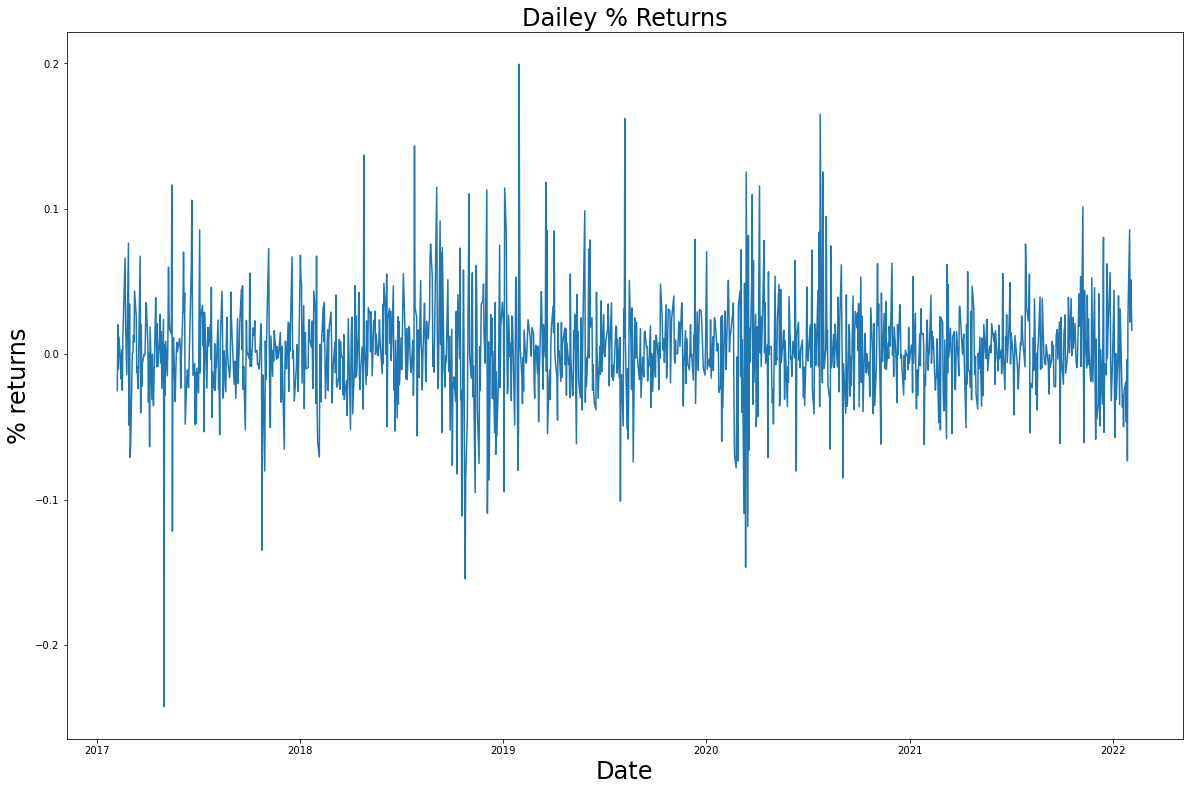

In [7]:
# Basic Daily returns plot based on %
daily_changes = stock1Close.pct_change(periods=1).dropna()

plt.figure(figsize=(20,13))
plt.xlabel('Date', size=24)
plt.ylabel('% returns', size=24)
plt.title('Dailey % Returns', size=24)
plt.plot(daily_changes)

In [8]:
m = statistics.median(daily_changes)
daily_changes.describe()
s = statistics.stdev(daily_changes)
mean = statistics.mean(daily_changes)
s1 = s * 2
s2 = s * 3
s0 = -(s)
s_1 = s0 * 2
s_2 = s0 * 3


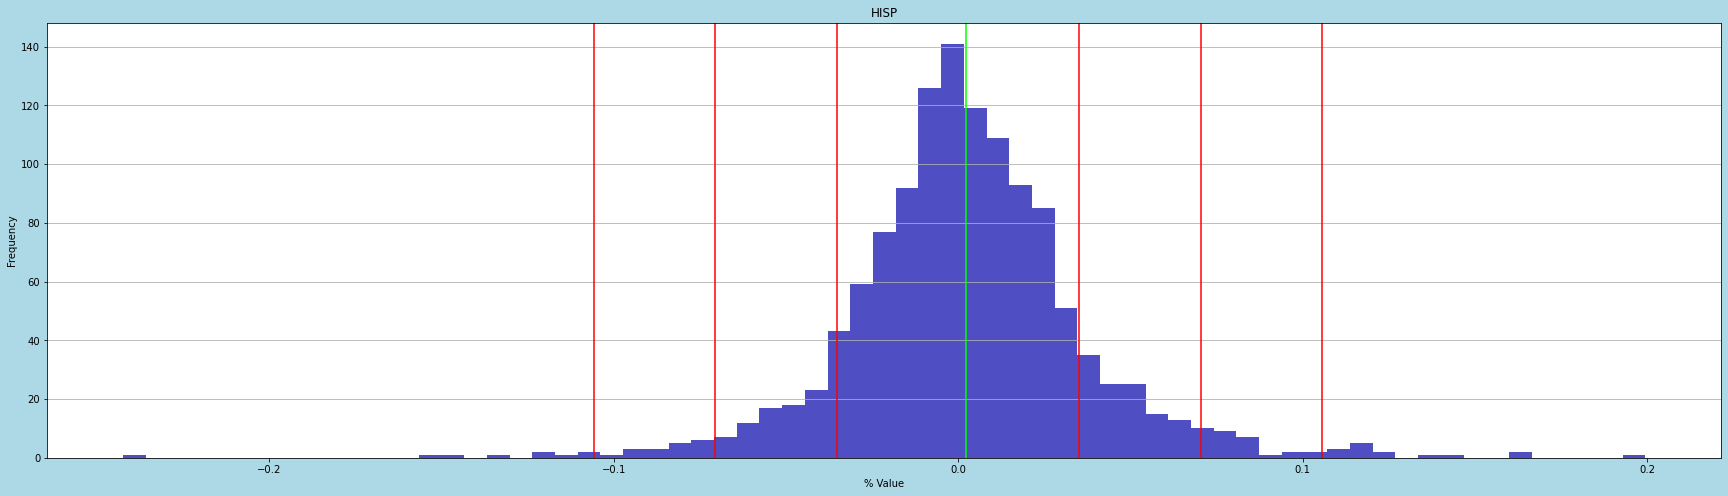

In [10]:
plt.figure(figsize=(30,8),facecolor='#add8e6' ,edgecolor='blue')

bin_values = np.arange(start=-0.4, stop=0.4, step=0.01)

n, bins, patches = plt.hist(x=daily_changes, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=1)

plt.grid(axis='y')
plt.xlabel('% Value')
plt.ylabel('Frequency')
plt.title('HISP')
plt.axvline(s, color='#ff0000')
plt.axvline(s1, color='#ff0000')
plt.axvline(s2, color='#ff0000')
plt.axvline(mean, color='#00ff00')
plt.axvline(s0, color='#ff0000')
plt.axvline(s_1, color='#ff0000')
plt.axvline(s_2, color='#ff0000')




In [116]:
for x in daily_changes:
    if x>0.1057116734239931:
        print(x)
        


0.1164623393012858
0.10601259197128465
0.13697218521946253
0.1433022588000079
0.11481920464395823
0.11037893080377614
0.11314553679508466
0.11436955133117288
0.19948052740716316
0.11827956989247301
0.16204171114587473
0.12535256125982608
0.10999043943774067
0.11575487878640489
0.1650159792078827
0.12542516862868824


In [105]:
len(daily_changes)

1258

In [117]:
16/1258

0.012718600953895072

In [98]:
daily_changes.kurtosis()

4.800380553270112

In [25]:
daily_changes.skew()

0.07867765159100733

In [ ]:
# This needs to be worked on/ modified for ease of use


time_period = 10
df_stock = yf.download(tickers = 'INTC', period = '10y', interval = '1d', group_by = 'ticker')

intc = df_stock['INTC'][['Close']].dropna()

max_index = len(intc['Close'])


intc_cagr = np.power((intc['Close'].iloc[max_index -1]/intc['Close'].iloc[0]), (1/time_period)) - 1
print(intc_cagr)



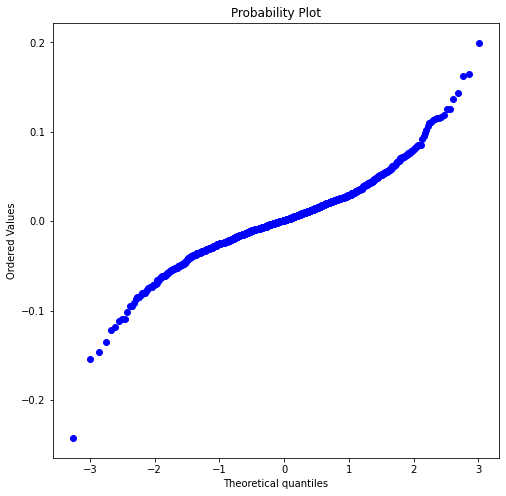

In [26]:
figure = plt.figure(figsize=(8, 8))

ax = figure.add_subplot(111)

stats.probplot(daily_changes, dist='norm', plot=ax)

plt.show();

In [ ]:
print(tslaClose)

corr = pearsonr(dailey_changes, another stock)
print(corr)